# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

1. What is the relation between the age and Income?

2. For a one percent increase in the Age how much the income increases?

3. Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

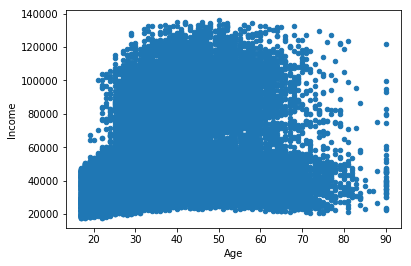

In [3]:
income.plot(x='Age', y='Income', kind='scatter')
plt.show()

1. **What is the relation between the age and Income?**

Even though that both are numeric variables, is not expected that they keep a linear relationship. It's not intuituve that a person with more age, will have a higher incoming. 

In fact, what the plot above shows us is that the highest incoming is located in an age between 30 - 50. Then, decrease between 60 - 90 years old. **No linear!**

2. **For a one percent increase in the Age how much the income increases?**

Since there is no linear relationship, it's not possible to predict an income without an additional input. What we can try to do is to generate a linear model to try to determine the percentage increase.

In [4]:
# Library
from sklearn.linear_model import SGDRegressor # Using the (Stochastic) Gradient Descent method

In [5]:
# Create a function to normalize and denormalize the data 

def Norm_input(_in,mean,std):
    _out = (_in - mean)/ std
    return _out

def Norm_output(in_,mean, std):
    out_ = (in_ * std ) + mean
    return out_

In [6]:
# Variables definition
y = income['Income'].values
x = income['Age'].values
n_samples = x.shape[0]

# Mean and Std deviation?
y_mean, y_std = y.mean(), y.std()
x_mean, x_std = x.mean(), x.std()

x_age_n = Norm_input(x,x_mean,x_std)
y_income_n = Norm_input(y,y_mean, y_std)

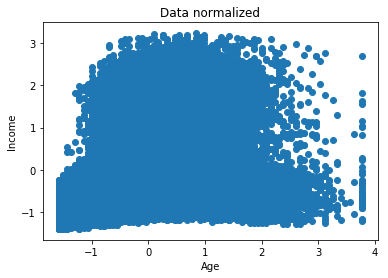

In [7]:
plt.scatter(x_age_n, y_income_n)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Data normalized')
plt.show()

#### Linear model creation
The method to create the linear method will be **Gradient Descent**.

In [8]:
# Let's evaluate the linear model with the data normalized and direct.

X_age = np.c_[np.ones(n_samples), x] # Direct
X_n = np.c_[np.ones(n_samples), x_age_n] # Normalized

In [9]:
# Linear model with normalization
linreg_n = SGDRegressor(fit_intercept=False, max_iter=1000,tol = 0.00000001)
linreg_n.fit(X_n, y_income_n)
linreg_n.coef_

array([-0.01797405,  0.28324486])

In [10]:
# Linear model direct
linreg = SGDRegressor(fit_intercept=False, max_iter=1000,tol = 0.00000001)
linreg.fit(X_age, y)
linreg.coef_

array([32889.12496809,   399.34698753])

In [11]:
# For the data with normalization...

Income_N = pd.DataFrame()
Income_N['Age'] = income.Age
Income_N['Income'] = income.Income
Income_N['Age_n'] = x_age_n
Income_N['Income_n'] = y_income_n
Income_N['Income_n_p'] = linreg_n.predict(X_n)
Income_N['Income_p'] = Norm_output(linreg_n.predict(X_n),y_mean, y_std)
Income_N.head()

,Age,Income,Age_n,Income_n,Income_n_p,Income_p
0,39,51806.0,0.030671,-0.064787,-0.009287,53219.320112
1,50,68719.0,0.837109,0.599376,0.219133,59036.055406
2,38,51255.0,-0.042642,-0.086424,-0.030052,52690.525994
3,53,47398.0,1.057047,-0.237886,0.281429,60622.437759
4,28,30493.0,-0.775768,-0.901735,-0.237706,47402.584818


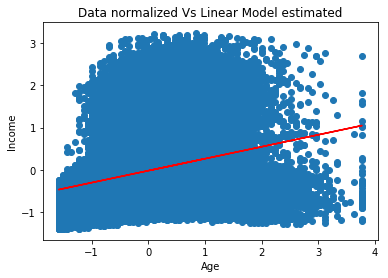

In [12]:
plt.scatter(Income_N.Age_n, Income_N.Income_n)
plt.plot(Income_N.Age_n, Income_N.Income_n_p, color='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Data normalized Vs Linear Model estimated')
plt.show()

In [13]:
# To evalute a percentual increase, will be consider than a 1% increase will be equivalent as 1 year.

t = np.array([0,1])
x_in = np.c_[np.ones(t.shape[0]), t]
p_in = linreg_n.predict(x_in)
p_in_resul = Norm_output(p_in,y_mean, y_std)
Result = p_in_resul[1] - p_in_resul[0]
print ("With the aproximation made, for a one percent increase in the age, the income increased in $ " + str(Result))

With the aproximation made, for a one percent increase in the age, the income increased in $ 7212.869734440705


Now, let's make this approximationn without the information normalized...

In [14]:
# For the data without normalization...

Income_p = pd.DataFrame()
Income_p['Age'] =income.Age
Income_p['Income'] = income.Income
Income_p['Income_pred'] = linreg.predict(X_age)
Income_p.head()

,Age,Income,Income_pred
0,39,51806.0,48463.657482
1,50,68719.0,52856.474345
2,38,51255.0,48064.310494
3,53,47398.0,54054.515307
4,28,30493.0,44070.840619


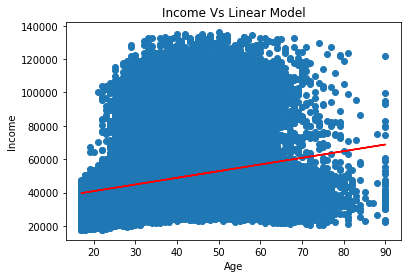

In [15]:
plt.scatter(Income_p.Age, Income_p.Income)
plt.plot(Income_p.Age, Income_p.Income_pred, color='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Income Vs Linear Model')
plt.show()

In [16]:
# To evalute a percentual increase, will be consider than a 1% increase will be equivalent as 1 year.

t = np.array([0,1])
x_in = np.c_[np.ones(t.shape[0]), t]
p_in = linreg.predict(x_in)
Result = p_in[1] - p_in[0]
print ("With the aproximation made, for a one percent increase in the age, the income increased in $ " + str(Result))

With the aproximation made, for a one percent increase in the age, the income increased in $ 399.34698752954864


Seems different.. Let's analyze both models!



Comparison between methods and linear model aproximation


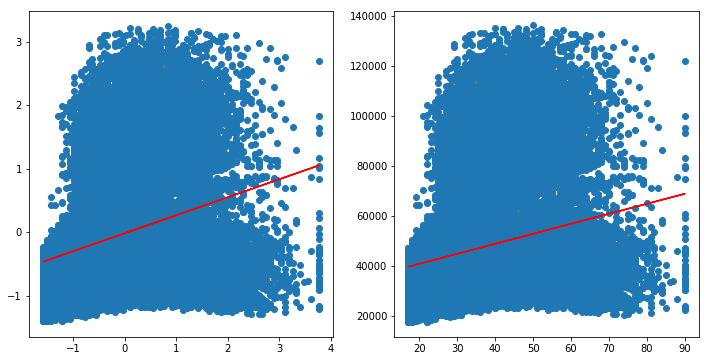



The normalized model seems more accurate than the direct model!


In [17]:
print("\n")
print("Comparison between methods and linear model aproximation")
      
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))

ax1.scatter(Income_N.Age_n, Income_N.Income_n)
ax1.plot(Income_N.Age_n, Income_N.Income_n_p, color='red')
    
ax2.scatter(Income_p.Age, Income_p.Income)
ax2.plot(Income_p.Age, Income_p.Income_pred, color='red')
    

plt.show()

print("\n")
print("The normalized model seems more accurate than the direct model!")

In order to answer the mentioned question *For a one percent increase in the Age how much the income increases?*, depends of the model! (in this case, if the model were created with data normalization or not)

3. **Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years**

From the models calculated above, has been created the calculation for each model to answer the question what is the income at the age 30 and 40.

* **Normalized model**

In [18]:
t = np.array([30,40])
t_n = Norm_input(t,x_mean,x_std)
x_in = np.c_[np.ones(t.shape[0]), t_n]
p_in = linreg_n.predict(x_in)
p_resul_n = Norm_output(p_in,y_mean, y_std)
print ('\nThe income when the Age is 30, is: $ ' + str(p_resul_n[0]) + " using the Gradient descent method with the data normalized")
print ('\nThe income when the Age is 40, is: $ ' + str(p_resul_n[1]) + " using the Gradient descent method with the data normalized")


The income when the Age is 30, is: $ 48460.17305330719 using the Gradient descent method with the data normalized

The income when the Age is 40, is: $ 53748.114229658 using the Gradient descent method with the data normalized


* **Direct model**

In [19]:
t = np.array([30, 40])
x_in = np.c_[np.ones(t.shape[0]), t]
p_in = linreg.predict(x_in)
p_resul = p_in
p_resul
print ('\nThe income when the Age is 30, is: $ ' + str(p_resul[0]) + " using the Gradient descent method with the data direct into the model")
print ('\nThe income when the Age is 40, is: $ ' + str(p_resul[1]) + " using the Gradient descent method with the data direct into the model")


The income when the Age is 30, is: $ 44869.53459397287 using the Gradient descent method with the data direct into the model

The income when the Age is 40, is: $ 48863.00446926837 using the Gradient descent method with the data direct into the model


Let's see both results

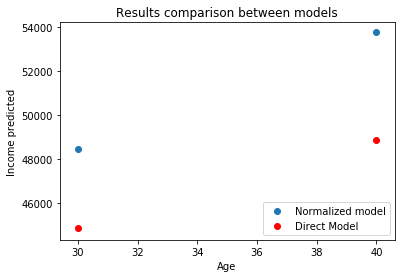

In [20]:
plt.scatter(t,p_resul_n)
plt.scatter(t,p_resul, color='red')
plt.xlabel('Age')
plt.ylabel('Income predicted')
plt.legend(('Normalized model', 'Direct Model'),loc='lower right')
plt.title('Results comparison between models')
plt.show()

# Exercise 4.2
Evaluate the model using the MSE

In [21]:
from sklearn import metrics
import numpy as np

MSE_norm =  metrics.mean_squared_error(Income_N['Income'],Income_N['Income_p'])
MSE_norm_n =  metrics.mean_squared_error(Income_N['Income_n'],Income_N['Income_n_p'])
MSE_direct = metrics.mean_squared_error(Income_p['Income'],Income_p['Income_pred'])

print('\n')
print('MSE normalized (all data still normalized):', str(MSE_norm_n))
print('MSE normalized:', str(MSE_norm))
print('MSE direct:', str(MSE_direct))



MSE normalized (all data still normalized): 0.9160374019627062
MSE normalized: 594025820.2638903
MSE direct: 624195708.8119761



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

* Will be use the **normalized method** calculated in previous literals

In [22]:
# Variables definition
y = income['Income'].values
x = income['Age'].values
n_samples = x.shape[0]
x2 = np.power(x,2)

# Mean and Std deviation?
y_mean, y_std = y.mean(), y.std()
x_mean, x_std = x.mean(), x.std()
x2_mean, x2_std = x2.mean(), x2.std()

x_age_n = Norm_input(x,x_mean,x_std)
x_age2_n = Norm_input(x2,x2_mean,x2_std)
y_income_n = Norm_input(y,y_mean, y_std)

X_n2 = np.c_[np.ones(n_samples), x_age_n, x_age2_n] # Normalized with age^2

A new model is proposed with the following equation:
$$ Income =  \beta_0 + Age \beta_1 + Age^2 \beta_2$$

Because that, will be use the OLS equation in order to solve the $ \beta $ required in order to solve the equation problem

$$ \beta = (X^T X)^{-1} X^T Y $$

In [23]:
betas = np.dot(np.linalg.inv(np.dot(X_n2.T, X_n2)),np.dot(X_n2.T, y_income_n))
betas

array([-1.03819738e-17,  1.67751068e+00, -1.41415206e+00])

Let's comparate it with a linear model using *scikit-learn*. The $ \beta's $ should change? 

In [24]:
# Linear model with normalization
linreg_n_age2 = SGDRegressor(fit_intercept=False, max_iter=1000,tol = 0.00000001)
linreg_n_age2.fit(X_n2, y_income_n)
linreg_n_age2.coef_

array([ 0.00394156,  1.62986956, -1.3740056 ])

The $ \beta's $ changed (Of course!) but similar. There are different methods to reach the same answer.

It's important to keep on mind that this model have the data normalized. If want to be use, the input and output should be treat.

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In order to answer this question, we should check the database to establish which variables can be useful to determine this new model.

In [25]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [26]:
income.dtypes

Age                 int64
Workclass          object
fnlwgt              int64
Education          object
Education-Num       int64
Martial Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours per week      int64
Country            object
Income            float64
dtype: object


According to the information above, we should use the variables: **Age**, **Capital Gain**, **Capital Loss** and **Hours per week** for the new linear model.

These are the numeric variables that doesn't unmask categorical variables such as **Education-Num** and **fnlwgt**

In [27]:
income.rename(columns={"Capital Gain": "Capital_Gain", "Capital Loss": "Capital_Loss",
                                 "Hours per week": "Hours_per_week"}, inplace=True)

In [28]:
Model = pd.DataFrame()
Model["Income"] = income.Income
Model["Age"] = income.Age
Model["Capital_Gain"] = income.Capital_Gain
Model["Capital_Loss"] = income.Capital_Loss
Model["Hours_per_week"] = income.Hours_per_week
Model.head()

,Income,Age,Capital_Gain,Capital_Loss,Hours_per_week
0,51806.0,39,2174,0,40
1,68719.0,50,0,0,13
2,51255.0,38,0,0,40
3,47398.0,53,0,0,40
4,30493.0,28,0,0,40


In [29]:
# Variables definition
y = Model['Income'].values
x_age = Model['Age'].values
x_capGan = Model['Capital_Gain'].values
x_capLoss = Model['Capital_Loss'].values
x_HpW = Model['Hours_per_week'].values
n_samples = y.shape[0]

# Mean and Std deviation?
y_mean, y_std = y.mean(), y.std()
x_age_mean, x_age_std = x_age.mean(), x_age.std()
x_capGan_mean, x_capGan_std = x_capGan.mean(), x_capGan.std()
x_capLoss_mean, x_capLoss_std = x_capLoss.mean(), x_capLoss.std()
x_HpW_mean, x_HpW_std = x_HpW.mean(), x_HpW.std()

#Normalization
y_n = Norm_input(y,y_mean, y_std)
x_age_n = Norm_input(x_age,x_age_mean,x_age_std)
x_capGan_n = Norm_input(x_capGan,x_capGan_mean,x_capGan_std)
x_capLoss_n = Norm_input(x_capLoss,x_capLoss_mean,x_capLoss_std)
x_HpW_n = Norm_input(x_HpW,x_HpW_mean,x_HpW_std)

#Input vector
X_n = np.c_[np.ones(n_samples), x_age_n, x_capGan_n, x_capLoss_n, x_HpW_n]

In [30]:
linreg_n_Model = SGDRegressor(fit_intercept=False, max_iter=1000,tol = 0.00000001)
linreg_n_Model.fit(X_n,y_n)
linreg_n_Model.coef_

array([-0.01551125,  0.25330757,  0.18674722,  0.10202134,  0.24324733])

In [31]:
Model['Income_n'] = y_n
Model['Income_pred_n'] = linreg_n_Model.predict(X_n)
Model['Income_pred'] = Norm_output(linreg_n_Model.predict(X_n),y_mean,y_std)
Model.head()

,Income,Age,Capital_Gain,Capital_Loss,Hours_per_week,Income_n,Income_pred_n,Income_pred
0,51806.0,39,2174,0,40,-0.064787,-0.010741,53182.287823
1,68719.0,50,0,0,13,0.599376,-0.393352,43439.041341
2,51255.0,38,0,0,40,-0.086424,-0.084285,51309.478520
3,47398.0,53,0,0,40,-0.237886,0.194274,58403.034733
4,30493.0,28,0,0,40,-0.901735,-0.269991,46580.441045


Let's calculate the MSE for the new model proposed!

In [32]:
print('MSE (using the outcome normalized):', metrics.mean_squared_error(Model['Income_n'], Model['Income_pred_n']))
print('MSE:', metrics.mean_squared_error(Model['Income'], Model['Income_pred']))

MSE (using the outcome normalized): 0.8007312559655518
MSE: 519252860.32724345


Do you remember the previous MSE for the model with only **Age** as variable ?

In [33]:
print("MSE for the model with 1 variable: " + str(MSE_norm))
print("MSE for the model with 4 variables: ", metrics.mean_squared_error(Model['Income'], Model['Income_pred']))

print("\n")

print('Using the outcome normalized')
print("MSE for the model with 1 variable: " + str(MSE_norm_n))
print("MSE for the model with 4 variables: ", metrics.mean_squared_error(Model['Income_n'], Model['Income_pred_n']))

MSE for the model with 1 variable: 594025820.2638903
MSE for the model with 4 variables:  519252860.32724345


Using the outcome normalized
MSE for the model with 1 variable: 0.9160374019627062
MSE for the model with 4 variables:  0.8007312559655518


The model with *4* variables has a lower MSE!

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [34]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [35]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

1. Create Y and X

2. What is the distribution of the churners?

3. Split the data in train (70%) and test (30%)


1. **Create Y and X**

In order to determine what is the best matrix (X and Y) for the exercise, will be identify the type of each variable. So, will be reject the **object** type since is not a numeric variable.

In [36]:
data_ = data
data_.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

Will be ignore "State", "Phone", "Int'l Plan" and "VMail Plan". 

"Churn?" won't be delete since is the response.

In [37]:
data_.drop(['State', 'Phone', "Int'l Plan", 'VMail Plan'], axis=1, inplace=True)

Additional to it, will be ignore "Account Length" and "Area Code" since these variables that unmask categorical variables expressed on numbers.

In [38]:
data_.drop(['Account Length', 'Area Code'], axis=1, inplace=True)
data_.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Let's change the "False" or "True" to 0 or 1

In [39]:
data_Dummy = pd.get_dummies(data_, columns=["Churn?"])
data_Dummy.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?_False.,Churn?_True.
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [40]:
data_Dummy.drop(['Churn?_False.'],axis=1,inplace=True)
data_Dummy.rename(columns={"Churn?_True.": "Churn"}, inplace=True)
data_Dummy.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The logit model to calculate will consider the number *1* like the user left the company. 

In [41]:
temp = data_Dummy.drop(['Churn'],axis=1)

X = temp.values
y = data_Dummy.Churn

Answering the question, the matrix **Y** is:

In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: uint8

Answering the question, the matrix **X** is:

In [43]:
X

array([[ 25.  , 265.1 , 110.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 26.  , 161.6 , 123.  , ...,   3.  ,   3.7 ,   1.  ],
       [  0.  , 243.4 , 114.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [  0.  , 180.8 , 109.  , ...,   6.  ,   3.81,   2.  ],
       [  0.  , 213.8 , 105.  , ...,  10.  ,   1.35,   2.  ],
       [ 25.  , 234.4 , 113.  , ...,   4.  ,   3.7 ,   0.  ]])

2. **What is the distribution of the churners?**

Will be consider a Binomial distribution with the following parameters. For more information about the Binomial distribution check the following link: http://www.stat.yale.edu/Courses/1997-98/101/binom.htm

In [44]:
print("Binomial distribution parameters: ")
print("n: ",  data_Dummy.Churn.count())
print("p: ", data_Dummy.Churn.sum() / data_Dummy.Churn.count())
print("q: ",(1 - data_Dummy.Churn.sum() / data_Dummy.Churn.count()))

Binomial distribution parameters: 
n:  3333
p:  0.14491449144914492
q:  0.8550855085508551


3. **Split the data in train (70%) and test (30%)**

What is the 70% of the dataset? 

In [45]:
train_n = np.round(data_Dummy.shape[0] * 0.77).astype(int)
test_n = (data_Dummy.shape[0] - train_n).astype(int)

print("The dataset will be split in the first " + str(train_n) + " elemnts for training and the last " + 
      str(test_n) + " for test")

The dataset will be split in the first 2566 elemnts for training and the last 767 for test


In [46]:
X_ = X[:train_n] # training matrix for X
y_ = y[:train_n] # training matrix for y
X_test = X[train_n:] # training matrix for X
y_test = y[train_n:] # training matrix for y

data_Test = data_Dummy[train_n:]

The matrices above will be used as training for the logit model to build and test that model.

# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

Using the matrices for training built above, the logit model estimate is obtain using *Scikit-Learn*

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_, y_)
logreg.coef_

array([[-0.02388845,  0.0134657 ,  0.00192362, -0.0100713 ,  0.00940188,
         0.00194538, -0.03731457,  0.00139034,  0.00074855,  0.03475106,
         0.06560178, -0.07458804,  0.10163368,  0.46379539]])

Now, let's **test** this model!

In [48]:
data_Test['Churn_p'] = logreg.predict(X_test)
data_Test.head()

C:\Users\amart\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,Churn_p
2566,0,168.6,92,28.66,187.7,107,15.95,216.5,95,9.74,14.4,8,3.89,2,0,0
2567,0,247.2,116,42.02,303.7,103,25.81,105.4,94,4.74,9.3,2,2.51,2,1,0
2568,0,224.2,81,38.11,243.3,90,20.68,147.8,66,6.65,12.0,8,3.24,3,0,0
2569,0,166.9,98,28.37,221.8,77,18.85,243.9,114,10.98,12.8,4,3.46,3,0,0
2570,43,118.4,100,20.13,144.1,108,12.25,158.1,91,7.11,8.5,6,2.30,1,0,0


Let's plot this result if can be visualize something

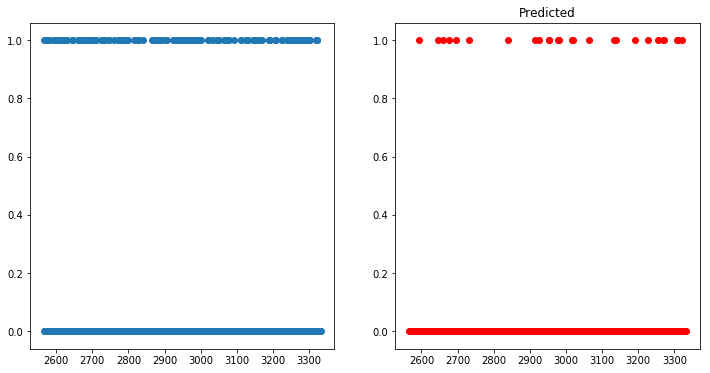

In [49]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
ax1.scatter(data_Test.index, data_Test.Churn)
ax2.scatter(data_Test.index, data_Test.Churn_p, color='red')

plt.title("Predicted")
plt.show()

Seems that the predicted model... calculated less than expected the churn

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set

a) - **Create a confusion matrix using the prediction on the 30% set.**

In [50]:
from sklearn.metrics import confusion_matrix

Conf = confusion_matrix(data_Test['Churn'], data_Test['Churn_p'])
Conf_norm = Conf / Conf.sum()
print("\n")
print("Confusion matrix (values)")
print("\n")
print("        Predict")
print("      0       1")
print("0   " + str(Conf[:1]))
print("1   " + str(Conf[1:]))
print("\n")



Confusion matrix (values)


        Predict
      0       1
0   [[628  10]]
1   [[113  16]]




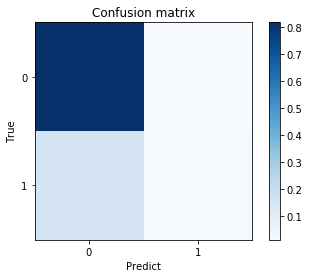

In [51]:
classes = ['0', '1']
tick_marks = np.arange(len(classes))

print("\n")
plt.imshow(Conf_norm, cmap=plt.cm.Blues, interpolation='None')
plt.title('Confusion matrix')
plt.xlabel('Predict')
plt.ylabel('True')
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.colorbar()
plt.show()

b) - **Estimate the accuracy of the model in the 30% set**

In [52]:
print("\n")
print("Classification - Accuracy")
print("\n")
print("True 0's        : " + str(Conf[0,0]) + " - " + str(Conf_norm[0,0]) + "%")
print("True 1's        : " + str(Conf[1,1]) + " - " + str(Conf_norm[1,1]) + "%")
print("False Negatives : " + str(Conf[1,0]) + " - " + str(Conf_norm[1,0]) + "%")
print("False Positives : " + str(Conf[0,1]) + " - " + str(Conf_norm[0,1]) + "%")



Classification - Accuracy


True 0's        : 628 - 0.81877444589309%
True 1's        : 16 - 0.020860495436766623%
False Negatives : 113 - 0.14732724902216426%
False Positives : 10 - 0.01303780964797914%
